In [3]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [5]:
# Directory where all the CP Excel files are stored
directory = 'C:\\Users\\HYF\\OneDrive - University of Bristol\\Dissertation\\CP_data'

In [6]:
# Initialize an empty list to store your DataFrames
dataframes = []

# Loop through the directory, open each Excel file, and append the DataFrame to the list
for filename in os.listdir(directory):
    if filename.endswith('.xlsx'):  # or '.xls' for older Excel files
        filepath = os.path.join(directory, filename)
        df = pd.read_excel(filepath)
        dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

In [7]:
combined_df['Year'] = pd.to_datetime(combined_df['SampleDateTime'], format='%d/%m/%Y %H:%M:%S').dt.year

In [8]:
# Initialize lists to store your DataFrames
initial_dataframes = []
last_two_dataframes = []

# Get a list of all the filenames in the directory
filenames = [f for f in os.listdir(directory) if f.endswith('.xlsx')]  # '.xls' for older Excel files can be added

# Loop through the filenames and add them to the appropriate list
for i, filename in enumerate(filenames):
    filepath = os.path.join(directory, filename)
    df = pd.read_excel(filepath)
    if i < 5:
        initial_dataframes.append(df)
    else:
        last_two_dataframes.append(df)

# Concatenate the initial five dataframes
combined_initial_df = pd.concat(initial_dataframes, ignore_index=True)

# Get unique 'NameDeterminandName' from the first 5 files
valid_names = combined_initial_df['NameDeterminandName'].unique()

# Filter the last two dataframes and concatenate
filtered_last_two_dfs = [df[df['NameDeterminandName'].isin(valid_names)] for df in last_two_dataframes]
combined_last_two_df = pd.concat(filtered_last_two_dfs, ignore_index=True)

# Finally, concatenate all filtered DataFrames together
final_df = pd.concat([combined_initial_df, combined_last_two_df], ignore_index=True)

# Check your final DataFrame
print(final_df.head())

  TreatmentPlant       SampleDateTime SampleLocationName  SampleValue  \
0   Garforth STW  31/03/2015 14:00:00     River Upstream         1.56   
1   Garforth STW  31/03/2015 14:00:00     River Upstream         2.54   
2   Garforth STW  31/03/2015 14:00:00     River Upstream         0.20   
3   Garforth STW  31/03/2015 14:00:00     River Upstream         2.07   
4   Garforth STW  31/03/2015 14:00:00     River Upstream         3.59   

  NameDeterminandName             UnitsName BelowMinReading  Latitude  \
0    nickel dissolved  micrograms per litre              No  53.75999   
1        nickel total  micrograms per litre              No  53.75999   
2      lead dissolved  micrograms per litre             Yes  53.75999   
3          lead total  micrograms per litre              No  53.75999   
4    copper dissolved  micrograms per litre              No  53.75999   

   Longitude  
0   -1.37775  
1   -1.37775  
2   -1.37775  
3   -1.37775  
4   -1.37775  


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720798 entries, 0 to 2720797
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TreatmentPlant       object 
 1   SampleDateTime       object 
 2   SampleLocationName   object 
 3   SampleValue          float64
 4   NameDeterminandName  object 
 5   UnitsName            object 
 6   BelowMinReading      object 
 7   Latitude             float64
 8   Longitude            float64
dtypes: float64(3), object(6)
memory usage: 186.8+ MB


In [10]:
column_name = 'NameDeterminandName'
# Find unique values in the column
unique_values = final_df[column_name].unique()

# Count the number of unique values
num_unique_values = final_df[column_name].nunique()

print(f"Number of unique values in '{column_name}':", num_unique_values)

Number of unique values in 'NameDeterminandName': 83


In [11]:
unique_values

array(['nickel dissolved', 'nickel total', 'lead dissolved', 'lead total',
       'copper dissolved', 'copper total', 'zinc dissolved', 'zinc total',
       'cadmium dissolved', 'cadmium total', 'mercury dissolved',
       'mercury total', 'iron dissolved', 'iron total',
       'aluminium dissolved', 'aluminium total', 'aluminium reactive',
       'chromium dissolved', 'chromium total', 'diethylhexylphthalate',
       'BDE28', 'BDE 47', 'BDE 99', 'BDE 100', 'BDE 153', 'BDE 154',
       'PFOS', 'PFOA', 'HCBDD', 'Nonylphenol', 'Octylphenols',
       'Tributyltin', 'fluoranthene', 'benzoapyrene', 'triclosan',
       'cypermethrin', 'total suspended solids',
       'ammoniacal nitrogen as N', 'total oxidised nitrogen as N',
       'Biochemical Oxygen Demand', 'Chemical Oxygen Demand',
       'total phosphorus as P', 'soluble reactive phosphate as P',
       'total organic carbon', 'dissolved organic carbon', 'pH',
       'calcium', 'sulphide', 'mono nonylphenol ethoxylates',
       'di non

In [12]:
final_df.isnull().sum()

TreatmentPlant             0
SampleDateTime             0
SampleLocationName         0
SampleValue                0
NameDeterminandName        0
UnitsName                  0
BelowMinReading            0
Latitude               85531
Longitude              85492
dtype: int64

In [13]:
# Assuming 'final_df' is your DataFrame loaded with the missing values for 'Latitude' and 'Longitude'

# Helper function to safely extract the mode or return None if empty
def safe_mode(series):
    modes = pd.Series.mode(series)
    if not modes.empty:
        return modes.iloc[0]
    return None

# Compute a single mode (the most common value) of 'Latitude' and 'Longitude' for each 'TreatmentPlant'
latitude_mode = final_df.groupby('TreatmentPlant')['Latitude'].agg(safe_mode)
longitude_mode = final_df.groupby('TreatmentPlant')['Longitude'].agg(safe_mode)

# Convert modes to a dictionary for faster access
latitude_mode_dict = latitude_mode.to_dict()
longitude_mode_dict = longitude_mode.to_dict()

# Use map to fill NaN values for Latitude and Longitude
final_df['Latitude'] = final_df['Latitude'].fillna(final_df['TreatmentPlant'].map(latitude_mode_dict))
final_df['Longitude'] = final_df['Longitude'].fillna(final_df['TreatmentPlant'].map(longitude_mode_dict))

# Check how many NaN values are left
print(final_df.isnull().sum())

TreatmentPlant            0
SampleDateTime            0
SampleLocationName        0
SampleValue               0
NameDeterminandName       0
UnitsName                 0
BelowMinReading           0
Latitude               9004
Longitude              9004
dtype: int64


In [14]:
final_df.isnull().sum()

TreatmentPlant            0
SampleDateTime            0
SampleLocationName        0
SampleValue               0
NameDeterminandName       0
UnitsName                 0
BelowMinReading           0
Latitude               9004
Longitude              9004
dtype: int64

In [15]:
final_df=final_df.dropna()

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2711794 entries, 0 to 2720797
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TreatmentPlant       object 
 1   SampleDateTime       object 
 2   SampleLocationName   object 
 3   SampleValue          float64
 4   NameDeterminandName  object 
 5   UnitsName            object 
 6   BelowMinReading      object 
 7   Latitude             float64
 8   Longitude            float64
dtypes: float64(3), object(6)
memory usage: 206.9+ MB


In [17]:
final_df.isnull().sum()

TreatmentPlant         0
SampleDateTime         0
SampleLocationName     0
SampleValue            0
NameDeterminandName    0
UnitsName              0
BelowMinReading        0
Latitude               0
Longitude              0
dtype: int64

In [18]:
final_df['Year'] = pd.to_datetime(final_df['SampleDateTime'], format='%d/%m/%Y %H:%M:%S').dt.year

In [19]:
final_df

,TreatmentPlant,SampleDateTime,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Latitude,Longitude,Year
0,Garforth STW,31/03/2015 14:00:00,River Upstream,1.560000,nickel dissolved,micrograms per litre,No,53.759990,-1.377750,2015
1,Garforth STW,31/03/2015 14:00:00,River Upstream,2.540000,nickel total,micrograms per litre,No,53.759990,-1.377750,2015
2,Garforth STW,31/03/2015 14:00:00,River Upstream,0.200000,lead dissolved,micrograms per litre,Yes,53.759990,-1.377750,2015
3,Garforth STW,31/03/2015 14:00:00,River Upstream,2.070000,lead total,micrograms per litre,No,53.759990,-1.377750,2015
4,Garforth STW,31/03/2015 14:00:00,River Upstream,3.590000,copper dissolved,micrograms per litre,No,53.759990,-1.377750,2015
...,...,...,...,...,...,...,...,...,...,...
2720793,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.017400,HCBDD,micrograms per litre,No,53.914099,-1.085668,2022
2720794,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.000150,Tributyltin,micrograms per litre,Yes,53.914099,-1.085668,2022
2720795,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.058030,fluoranthene,micrograms per litre,No,53.914099,-1.085668,2022
2720796,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.022246,benzoapyrene,micrograms per litre,No,53.914099,-1.085668,2022


In [20]:
final_df.to_csv('C:\\Users\\HYF\\OneDrive - University of Bristol\\Dissertation\\combined_data.csv', index=False)

In [50]:
shapefile_path = 'C:\\Users\\HYF\\OneDrive - University of Bristol\\Dissertation\\Boundaries_EN_BFE\\RGN_DEC_2023_EN_BFE.shp'  
regions_gdf = gpd.read_file(shapefile_path)

In [51]:
# Ensure the shapefile and data use the same coordinate reference system (CRS)
regions_gdf = regions_gdf.to_crs(epsg=4326)

In [52]:
# Step 3: Create a GeoDataFrame for the sample data
geometry = [Point(xy) for xy in zip(final_df['Longitude'], final_df['Latitude'])]
geo_df = gpd.GeoDataFrame(final_df, crs="EPSG:4326", geometry=geometry)

In [53]:
# 提取倒数第二列的列名
second_last_column = geo_df.columns[-2]

# 弹出该列并插入到第一列位置
geo_df.insert(0, second_last_column, geo_df.pop(second_last_column))

In [54]:
# Step 4: Spatial join to determine which region each point belongs to
joined_gdf = gpd.sjoin(geo_df, regions_gdf, how='left', predicate='within')

In [55]:
joined_gdf


,Year,TreatmentPlant,SampleDateTime,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Latitude,Longitude,geometry,index_right,RGN23CD,RGN23NM,BNG_E,BNG_N,LONG,LAT,GlobalID
0,2015,Garforth STW,31/03/2015 14:00:00,River Upstream,1.560000,nickel dissolved,micrograms per litre,No,53.759990,-1.377750,POINT (-1.37775 53.75999),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
1,2015,Garforth STW,31/03/2015 14:00:00,River Upstream,2.540000,nickel total,micrograms per litre,No,53.759990,-1.377750,POINT (-1.37775 53.75999),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
2,2015,Garforth STW,31/03/2015 14:00:00,River Upstream,0.200000,lead dissolved,micrograms per litre,Yes,53.759990,-1.377750,POINT (-1.37775 53.75999),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
3,2015,Garforth STW,31/03/2015 14:00:00,River Upstream,2.070000,lead total,micrograms per litre,No,53.759990,-1.377750,POINT (-1.37775 53.75999),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
4,2015,Garforth STW,31/03/2015 14:00:00,River Upstream,3.590000,copper dissolved,micrograms per litre,No,53.759990,-1.377750,POINT (-1.37775 53.75999),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720793,2022,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.017400,HCBDD,micrograms per litre,No,53.914099,-1.085668,POINT (-1.08567 53.91410),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
2720794,2022,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.000150,Tributyltin,micrograms per litre,Yes,53.914099,-1.085668,POINT (-1.08567 53.91410),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
2720795,2022,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.058030,fluoranthene,micrograms per litre,No,53.914099,-1.085668,POINT (-1.08567 53.91410),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343
2720796,2022,York Naburn,10/01/2022 15:00:00,Treatment Influent,0.022246,benzoapyrene,micrograms per litre,No,53.914099,-1.085668,POINT (-1.08567 53.91410),2.0,E12000003,Yorkshire and The Humber,446902.0,448736.0,-1.28714,53.9326,8904bd52-aa3b-426f-985a-b95c79ed7343


In [59]:
# Step 5: Calculate the average SampleValue for each region
average_values = joined_gdf.groupby(['Year','RGN23CD','NameDeterminandName'])['SampleValue'].mean().reset_index()  

# Merge the average values with the regions GeoDataFrame
regions_gdf = regions_gdf.merge(average_values, on='RGN23CD')  

In [60]:
regions_gdf

,RGN23CD,RGN23NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Year,NameDeterminandName,SampleValue
0,E12000001,North East,417314,600356,-1.72888,55.2970,0f3c8c9a-179f-492c-9d08-d3cce8102e95,"MULTIPOLYGON (((-1.53958 55.33800, -1.53967 55...",2015,BDE 100,0.000158
1,E12000001,North East,417314,600356,-1.72888,55.2970,0f3c8c9a-179f-492c-9d08-d3cce8102e95,"MULTIPOLYGON (((-1.53958 55.33800, -1.53967 55...",2015,BDE 153,0.000211
2,E12000001,North East,417314,600356,-1.72888,55.2970,0f3c8c9a-179f-492c-9d08-d3cce8102e95,"MULTIPOLYGON (((-1.53958 55.33800, -1.53967 55...",2015,BDE 154,0.000123
3,E12000001,North East,417314,600356,-1.72888,55.2970,0f3c8c9a-179f-492c-9d08-d3cce8102e95,"MULTIPOLYGON (((-1.53958 55.33800, -1.53967 55...",2015,BDE 47,0.000351
4,E12000001,North East,417314,600356,-1.72888,55.2970,0f3c8c9a-179f-492c-9d08-d3cce8102e95,"MULTIPOLYGON (((-1.53958 55.33800, -1.53967 55...",2015,BDE 99,0.000383
...,...,...,...,...,...,...,...,...,...,...,...
4123,E12000009,South West,285016,102566,-3.63342,50.8112,542604f9-f95e-43df-8d29-97e9d50eba09,"MULTIPOLYGON (((-6.39878 49.86570, -6.39868 49...",2022,lead dissolved,0.620000
4124,E12000009,South West,285016,102566,-3.63342,50.8112,542604f9-f95e-43df-8d29-97e9d50eba09,"MULTIPOLYGON (((-6.39878 49.86570, -6.39868 49...",2022,lead total,4.390000
4125,E12000009,South West,285016,102566,-3.63342,50.8112,542604f9-f95e-43df-8d29-97e9d50eba09,"MULTIPOLYGON (((-6.39878 49.86570, -6.39868 49...",2022,mercury dissolved,0.256100
4126,E12000009,South West,285016,102566,-3.63342,50.8112,542604f9-f95e-43df-8d29-97e9d50eba09,"MULTIPOLYGON (((-6.39878 49.86570, -6.39868 49...",2022,mercury total,0.756400


In [61]:
filtered_df = regions_gdf[(regions_gdf['NameDeterminandName'] == 'BDE 100')&(regions_gdf['Year'] == 2022)]

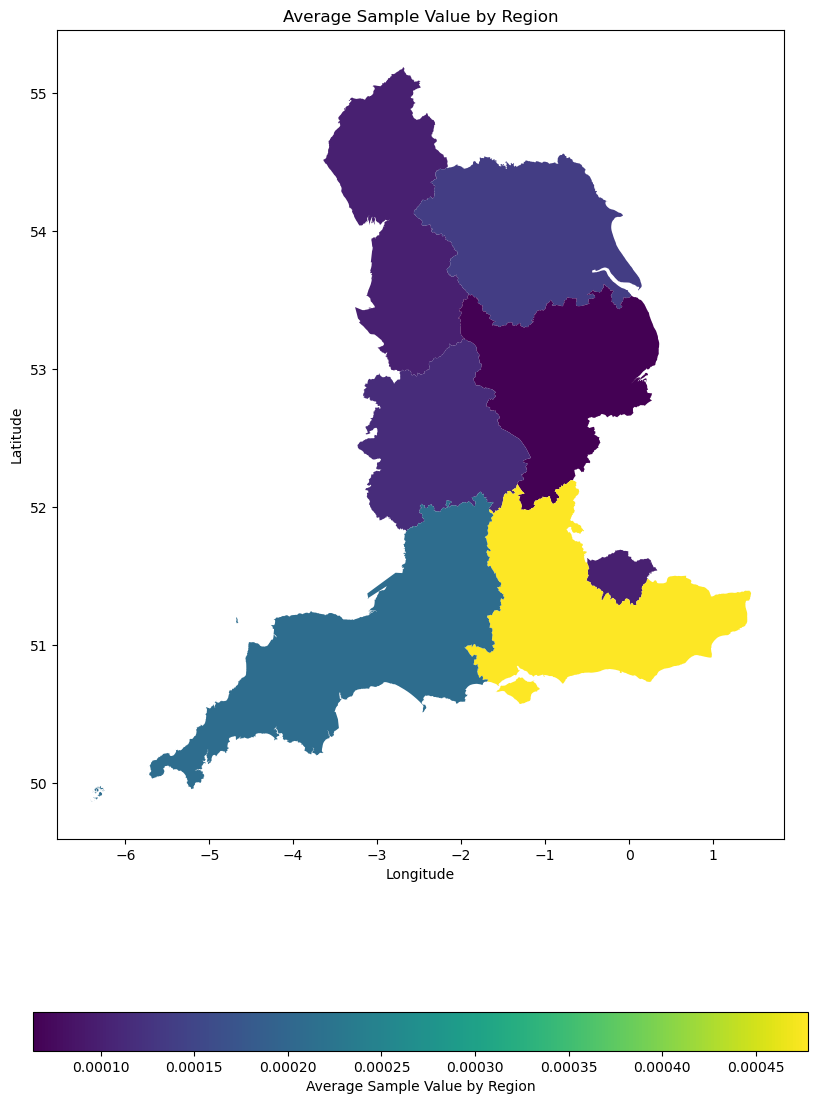

In [62]:
# Step 6: Generate graphs with a better colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot the regions with average sample values using the 'viridis' colormap
filtered_df.plot(column='SampleValue', ax=ax, legend=True,
                 legend_kwds={'label': "Average Sample Value by Region",
                              'orientation': "horizontal"},
                 cmap='viridis')  # Use 'viridis' colormap for better contrast

# Add title and labels
plt.title('Average Sample Value by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()